In [1]:
#We now want to add acceptance rate and entrance rate to our data file

import pandas as pd

#Read the CSV file into a Pandas DataFrame
df = pd.read_csv("Data/Florian_Wirtz_eigentlich_noch_was_mit_der.csv")

years = ['2019', '2020', '2021', '2022', '2023']

# Calculate acceptance rate and entrance rate for each year
for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    entrants_col = f'Entrances {year}'
    accept_rate_col = f'Acceptance Rate {year}'
    entrance_rate_col = f'Entrance Rate {year}'
    
    # Calculate acceptance rate: offers / applications
    df[accept_rate_col] = df[offers_col] / df[apps_col]
    
    # Calculate entrance rate: entrants / offers
    df[entrance_rate_col] = df[entrants_col] / df[offers_col]

df.to_csv("Data/MAXI.csv", index=False)

In [2]:
# Now we want to filter out the european students, in our data they are characterized by nationality
import csv

# Define the file paths, downloaded these csv files from GITHUB
eu_countries_file = "Data/EU-countries.csv"
nationalities_file = "Data/countries.csv"

# Initialize a set to store European nationalities
EU_nationalities = set()

# get EU countries from the CSV file
eu_countries = set()
with open(eu_countries_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        country_name = row[2].strip()  # country name is in first column
        eu_countries.add(country_name)

# Read the nationalities from the CSV file and filter European nationalities
with open(nationalities_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) 
    for row in reader:
        country_name = row[3].strip()  # country name is in fourth column
        if country_name in eu_countries: 
            EU_nationalities.add(row[4])  # nationality is in fifth column
# check if all countries are there(should be 27)            
print(len(EU_nationalities))

27


In [3]:
#Now we change the CSV file with the acceptance rates so it oonly includes EU students

# Define the file paths
input_csv_file = "Data/MAXI.csv" 
output_csv_file = "Data/EU_students_acceptance_by_department.csv"  

# Open the input CSV file for reading and the output CSV file for writing
with open(input_csv_file, newline='', encoding='utf-8') as input_file, \
     open(output_csv_file, 'w', newline='', encoding='utf-8') as output_file:
    # Create CSV reader and writer objects
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)

    # Read and write the first header row to the output file
    first_header = next(reader)
    writer.writerow(first_header)

    # Iterate over each row in the input CSV file
    for row in reader:
        # Check if the nationality in the first column is in the list of European nationalities
        if row[0].strip() in EU_nationalities:
            # Write the row to the output CSV file
            writer.writerow(row)


In [4]:
import pandas as pd

# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {'Year': [], 'Total_Applications': [], 'EU_Applications': [], 'Non-EU_Applications': [], 'Total_Acceptance_Rate': [], 'EU_Acceptance_Rate': [], 'Non-EU_Acceptance_Rate': []}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps
    
    summary_data['Year'].append(year)
    summary_data['Total_Applications'].append(total_apps)
    summary_data['EU_Applications'].append(eu_apps)
    summary_data['Non-EU_Applications'].append(non_eu_apps)
    summary_data['Total_Acceptance_Rate'].append(total_acceptance_rate)
    summary_data['EU_Acceptance_Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU_Acceptance_Rate'].append(non_eu_acceptance_rate)

summary_df = pd.DataFrame(summary_data)
summary_df


Year  Total_Applications  EU_Applications  Non-EU_Applications  \
0  2019             49864.0           9536.0              40328.0   
1  2020             51341.5           9347.5              41994.0   
2  2021             55669.0           8628.5              47040.5   
3  2022             55427.5           8070.0              47357.5   
4  2023             55299.0           7679.0              47620.0   

   Total_Acceptance_Rate  EU_Acceptance_Rate  Non-EU_Acceptance_Rate  
0               0.277274            0.288853                0.274536  
1               0.304023            0.316448                0.301257  
2               0.247903            0.269688                0.243907  
3               0.268414            0.309727                0.261374  
4               0.267455            0.317359                0.259408

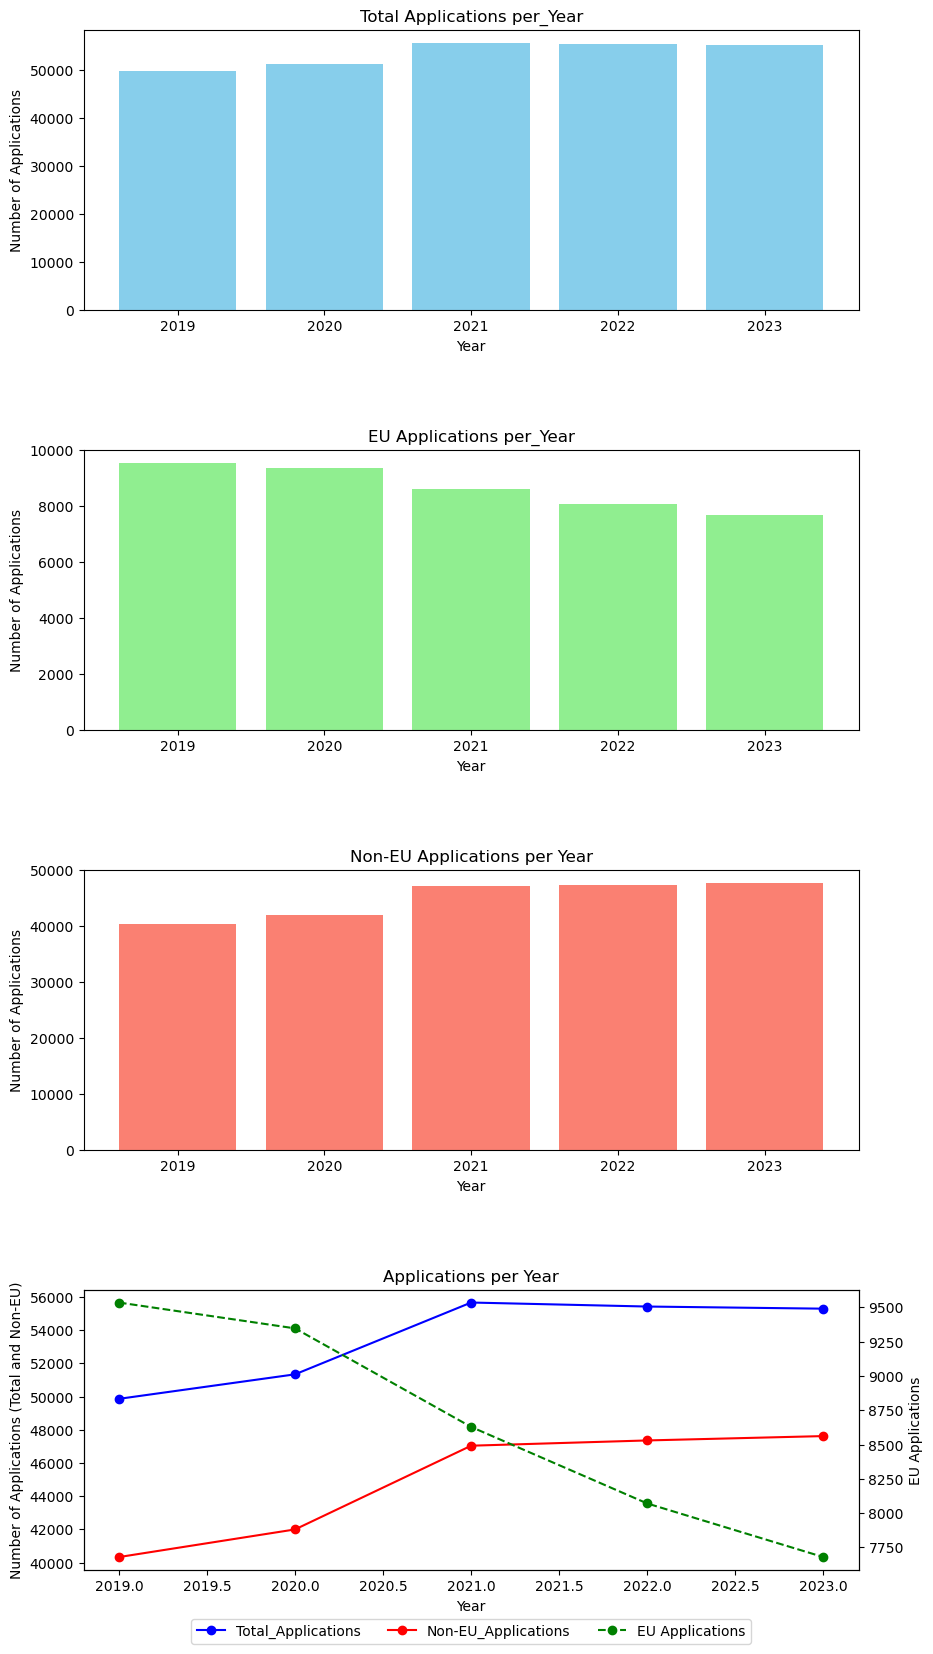

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the summary data
# We first need to calculate the summary data based on your df after filtering
years = ['2019', '2020', '2021', '2022', '2023']
summary_data = {
    "Year": [],
    "Total_Applications": [],
    "EU_Applications": [],
    "Non-EU_Applications": []
}

# Sum applications per year for EU and Total applications
for year in years:
    apps_col = f'Applications {year}'
    summary_data["Year"].append(int(year))
    summary_data["EU_Applications"].append(df[df['Nationality'].isin(EU_nationalities)][apps_col].sum())
    summary_data["Total_Applications"].append(df[apps_col].sum())
    summary_data["Non-EU_Applications"].append(df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum())

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Set up the plots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5)

# Plot total applications per year with a bar chart
axes[0].bar(summary_df['Year'], summary_df['Total_Applications'], color='skyblue')
axes[0].set_title('Total Applications per_Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Applications')

# Plot EU applications per year with a bar chart
axes[1].bar(summary_df['Year'], summary_df['EU_Applications'], color='lightgreen')
axes[1].set_title('EU Applications per_Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Applications')

# Plot Non-EU applications per year with a bar chart
axes[2].bar(summary_df['Year'], summary_df['Non-EU_Applications'], color='salmon')
axes[2].set_title('Non-EU Applications per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Applications')

# Add a line chart for applications per year for all categories
axes[3].plot(summary_df['Year'], summary_df['Total_Applications'], label='Total_Applications', marker='o', linestyle='-', color='blue')
axes[3].plot(summary_df['Year'], summary_df['Non-EU_Applications'], label='Non-EU_Applications', marker='o', linestyle='-', color='red')

# EU uses the secondary y-axis
ax2 = axes[3].twinx()
ax2.plot(summary_df['Year'], summary_df['EU_Applications'], label='EU Applications', marker='o', linestyle='--', color='green')
ax2.set_ylabel('EU Applications')

axes[3].set_title('Applications per Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Number of Applications (Total and Non-EU)')

# Handling the legend: combining legends from both axes and placing them optimally
lines, labels = axes[3].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()


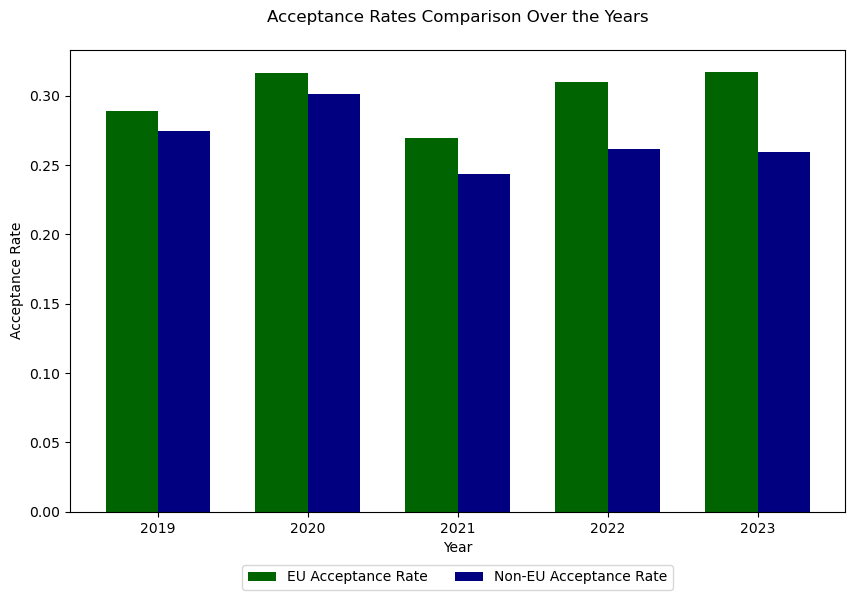

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# First, ensure that the acceptance rates are added to the summary_df DataFrame
# Assuming 'df' is your main DataFrame with the applications, offers, and entrances data.
years = [2019, 2020, 2021, 2022, 2023]
summary_data = {
    'Year': [],
    'Total_Applications': [],
    'EU_Applications': [],
    'Non-EU_Applications': [],
    'Total_Acceptance_Rate': [],
    'EU_Acceptance_Rate': [],
    'Non-EU_Acceptance_Rate': []
}

for year in years:
    apps_col = f'Applications {year}'
    offers_col = f'Offers {year}'
    
    # Total calculations
    total_apps = df[apps_col].sum()
    total_offers = df[offers_col].sum()
    total_acceptance_rate = total_offers / total_apps
    
    # EU calculations
    eu_apps = df[df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    eu_offers = df[df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    eu_acceptance_rate = eu_offers / eu_apps if eu_apps > 0 else 0  # Prevent division by zero
    
    # Non-EU calculations
    non_eu_apps = df[~df['Nationality'].isin(EU_nationalities)][apps_col].sum()
    non_eu_offers = df[~df['Nationality'].isin(EU_nationalities)][offers_col].sum()
    non_eu_acceptance_rate = non_eu_offers / non_eu_apps if non_eu_apps > 0 else 0  # Prevent division by zero
    
    summary_data['Year'].append(year)
    summary_data['Total_Applications'].append(total_apps)
    summary_data['EU_Applications'].append(eu_apps)
    summary_data['Non-EU_Applications'].append(non_eu_apps)
    summary_data['Total_Acceptance_Rate'].append(total_acceptance_rate)
    summary_data['EU_Acceptance_Rate'].append(eu_acceptance_rate)
    summary_data['Non-EU_Acceptance_Rate'].append(non_eu_acceptance_rate)

# Convert summary_data to DataFrame
summary_df = pd.DataFrame(summary_data)

# Now plot the acceptance rates
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # bar width
x = np.arange(len(years))  # the label locations

# Plotting the bars for EU and Non-EU acceptance rates
ax.bar(x - width/2, summary_df['EU_Acceptance_Rate'], width, label='EU Acceptance Rate', color='darkgreen')
ax.bar(x + width/2, summary_df['Non-EU_Acceptance_Rate'], width, label='Non-EU Acceptance Rate', color='navy')

ax.set_xlabel('Year')
ax.set_ylabel('Acceptance Rate')
ax.set_title('Acceptance Rates Comparison Over the Years', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Year'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()


                            OLS Regression Results                            
Dep. Variable:        EU_Applications   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     181.5
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0545
Time:                        15:55:24   Log-Likelihood:                -24.197
No. Observations:                   5   AIC:                             56.39
Df Residuals:                       1   BIC:                             54.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9159.0000    152.906  

/var/folders/zm/zrxz6sxj0jg2_5fl0nzm4kw80000gn/T/ipykernel_8551/3671024450.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_brexit['Predicted_Applications'] = pre_brexit_model.predict(pre_brexit[['Time', 'Post_Brexit']])
/Users/timgrutimner/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


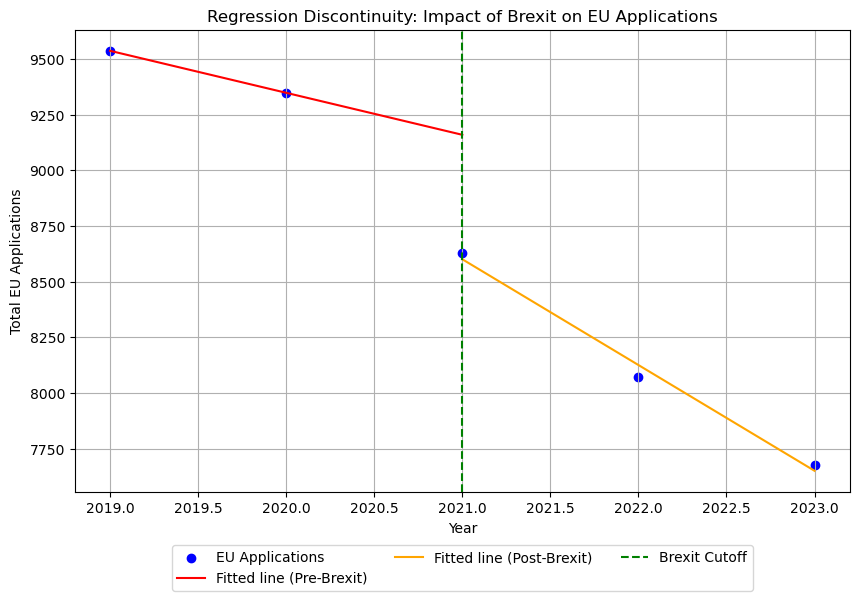

In [41]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming summary_df is already defined and contains 'Year' and 'EU_Applications'
summary_df = summary_df.sort_values('Year')

summary_df['Time'] = summary_df['Year'] - 2021
summary_df['Post_Brexit'] = (summary_df['Year'] > 2020).astype(int)
formula = 'EU_Applications ~ Time + Post_Brexit + Time:Post_Brexit'

pre_brexit = summary_df[summary_df['Year'] <= 2020]
pre_brexit_model = smf.ols(formula, data=pre_brexit).fit()

# Use the pre-Brexit model to predict for the pre-Brexit data and the cutoff year.
pre_brexit['Predicted_Applications'] = pre_brexit_model.predict(pre_brexit[['Time', 'Post_Brexit']])
cutoff_prediction = pre_brexit_model.params['Intercept']  # The time is 0 at the cutoff, so this is just the intercept

# Append the prediction for the cutoff year to the pre-Brexit DataFrame.
cutoff_df = pd.DataFrame({'Year': [2021], 'Time': [0], 'Post_Brexit': [0], 'Predicted_Applications': [cutoff_prediction]})
pre_brexit_extended = pd.concat([pre_brexit, cutoff_df])

rdd_model = smf.ols(formula, data=summary_df).fit()

# Print the summary results from the regression discontinuity model
print(rdd_model.summary())

# Print the p-value for the Post_Brexit effect explicitly
p_value = rdd_model.pvalues['Post_Brexit']
print(f"The p-value for the Post_Brexit effect is: {p_value:.4f}")

# Create the scatter plot with the data points
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Year'], summary_df['EU_Applications'], color='blue', label='EU Applications')

# Plot the extended pre-Brexit fitted line up to the cutoff
plt.plot(pre_brexit_extended['Year'], pre_brexit_extended['Predicted_Applications'], color='red', label='Fitted line (Pre-Brexit)')

# Add the fitted line for post-Brexit
post_brexit = summary_df[summary_df['Year'] > 2020]
plt.plot(post_brexit['Year'], rdd_model.predict(post_brexit), color='orange', label='Fitted line (Post-Brexit)')

# Add the Brexit cutoff line
plt.axvline(x=2021, color='green', linestyle='--', label='Brexit Cutoff')

# Set the title and labels
plt.title('Regression Discontinuity: Impact of Brexit on EU Applications')
plt.xlabel('Year')
plt.ylabel('Total EU Applications')

# Adjust legend to prevent overlap
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.grid(True)
plt.show()


## Interpretation of the Regression dicontinuity

In examining the impact of post-Brexit policies on the influx of EU student applicants, we delve into the nuanced temporal dynamics surrounding the UK's referendum decision. With the referendum occurring on June 31, 2020, after the application cycle for 2020 had concluded, a pivotal shift in policy was set in motion. We operate under the assumption that applicants prior to this juncture were aware of their exemption from overseas fee obligations, while subsequent cohorts were confronted with this financial consideration.

Our analysis, anchored in a regression discontinuity framework, highlights the anticipated treatment effect materializing in 2021. Specifically, we observe an apparent increase in the number of applications from EU students by approximately 550—a noteworthy shift. However, the statistical evaluation reveals a lack of robust evidence to support the hypothesis of a substantial effect. With a p-value hovering around 18.3%, we are unable to confidently assert a discernible departure from the status quo, even at a 15% significance level. This ambiguity is compounded by the considerable standard errors inherent in our analysis, stemming from the constrained temporal scope of our dataset spanning merely the last five years.

Delving deeper into the intricacies of the data, we discern additional insights. Prior to Brexit, the average decline in applicants appears marginal, hovering around 190 per annum. However, this trend fails to attain statistical significance. Notably, post-Brexit, the decline in applicants accelerates, with an estimated annual decrement of approximately -290 applications. Despite this apparent shift, the associated coefficient fails to breach the threshold of statistical significance, underscoring the nuanced nature of the post-Brexit landscape and the multifaceted influences at play.

PG Applications in 2020: 5096.5
PG Applications in 2022: 4482.5
UG Applications in 2020: 4251.0
UG Applications in 2022: 3587.5
Slope for PG trend: -307.0
Slope for UG trend: -331.75
Hypothetical UG Applications in 2020: 3637.0
DiD: -49.5


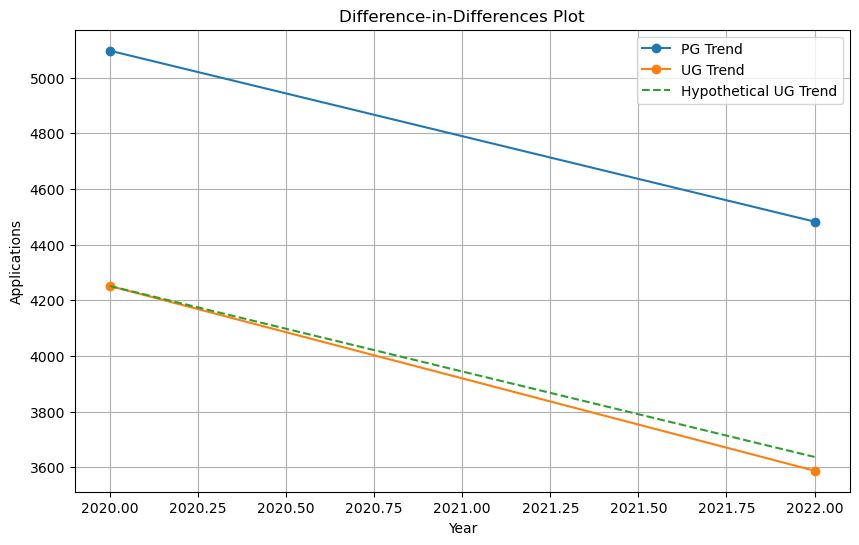

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV
df = pd.read_csv("Data/EU_students_acceptance_by_department.csv")

# Filter data for relevant years and programs
pg_2020 = df[df['Program'].str.contains('PG')]['Applications 2020'].sum()
pg_2022 = df[df['Program'].str.contains('PG')]['Applications 2022'].sum()
ug_2020 = df[df['Program'].str.contains('UG')]['Applications 2020'].sum()
ug_2022 = df[df['Program'].str.contains('UG')]['Applications 2022'].sum()

# Calculate the slopes for PG and UG trends
pg_slope = (pg_2022 - pg_2020) / (2022 - 2020)
ug_slope = (ug_2022 - ug_2020) / (2022 - 2020)

# Calculate the hypothetical UG Applications in 2022
hypothetical_ug_2022 = ug_2020 + pg_slope*(2022 - 2020)

# Calculate the DiD
did = (ug_2022 - ug_2020) - (pg_2022 - pg_2020)

# Print the results
print("PG Applications in 2020:", pg_2020)
print("PG Applications in 2022:", pg_2022)
print("UG Applications in 2020:", ug_2020)
print("UG Applications in 2022:", ug_2022)
print("Slope for PG trend:", pg_slope)
print("Slope for UG trend:", ug_slope)
print("Hypothetical UG Applications in 2022:", hypothetical_ug_2022)
print("DiD:", did)

# Plotting
years = [2020, 2022]
pg_applications = [pg_2020, pg_2022]
ug_applications = [ug_2020, ug_2022]
hypothetical_ug_applications = [ug_2020, hypothetical_ug_2022]

plt.figure(figsize=(10, 6))

# Plot PG trend
plt.plot(years, pg_applications, marker='o', label='PG Trend')

# Plot UG trend
plt.plot(years, ug_applications, marker='o', label='UG Trend')

# Plot hypothetical UG trend
plt.plot(years, hypothetical_ug_applications, linestyle='--', label='Hypothetical UG Trend')

plt.title('Difference-in-Differences Plot')
plt.xlabel('Year')
plt.ylabel('Applications')
plt.legend()
plt.grid(True)
plt.show()


NON EU Applications in 2020: 41994.0
NON EU Applications in 2022: 47357.5
EU Applications in 2020: 9347.5
EU Applications in 2022: 8070.0
Slope for NON EU trend: 2681.75
Slope for EU trend: -638.75
Hypothetical EU Applications in 2022: 14711.0
DiD: -6641.0


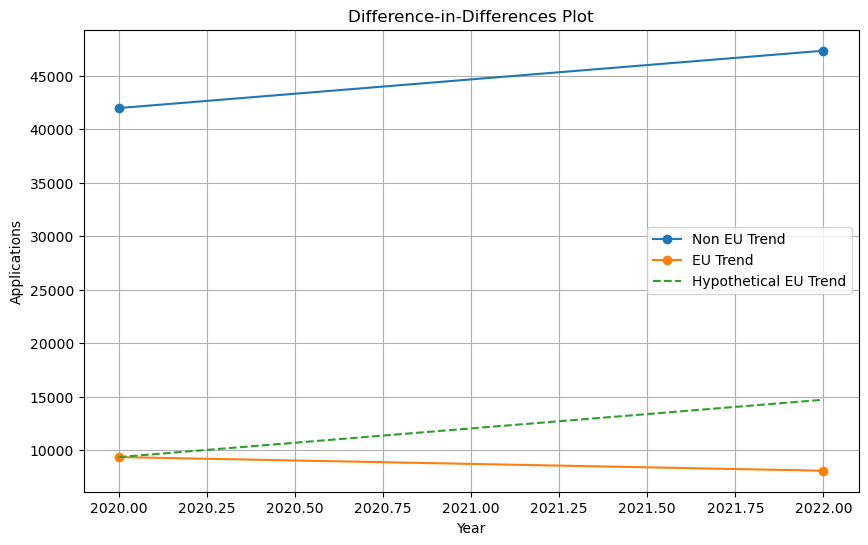

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for relevant years and programs
EU_2020 = summary_df.loc[1, 'EU_Applications']
EU_2022 = summary_df.loc[3, 'EU_Applications']
NON_EU_2020 = summary_df.loc[1, 'Non-EU_Applications']
NON_EU_2022 = summary_df.loc[3, 'Non-EU_Applications']

# Calculate the slopes for EU and NOn EU trends
EU_slope = (EU_2022 - EU_2020) / (2022 - 2020)
NON_EU_slope = (NON_EU_2022 - NON_EU_2020) / (2022 - 2020)

# Calculate the hypothetical EU Applications in 2022
hypothetical_EU_2022 = EU_2020 + NON_EU_slope*(2022 - 2020)

# Calculate the DiD
did = (EU_2022 - EU_2020) - (NON_EU_2022 - NON_EU_2020)

# Print the results
print("NON EU Applications in 2020:", NON_EU_2020)
print("NON EU Applications in 2022:", NON_EU_2022)
print("EU Applications in 2020:", EU_2020)
print("EU Applications in 2022:", EU_2022)
print("Slope for NON EU trend:", NON_EU_slope)
print("Slope for EU trend:", EU_slope)
print("Hypothetical EU Applications in 2022:", hypothetical_EU_2022)
print("DiD:", did)

# Plotting
years = [2020, 2022]
NON_EU_applications = [NON_EU_2020, NON_EU_2022]
EU_applications = [EU_2020, EU_2022]
hypothetical_EU_applications = [EU_2020, hypothetical_EU_2022]

plt.figure(figsize=(10, 6))

# Plot PG trend
plt.plot(years, NON_EU_applications, marker='o', label='Non EU Trend')

# Plot UG trend
plt.plot(years, EU_applications, marker='o', label='EU Trend')

# Plot hypothetical UG trend
plt.plot(years, hypothetical_EU_applications, linestyle='--', label='Hypothetical EU Trend')

plt.title('Difference-in-Differences Plot')
plt.xlabel('Year')
plt.ylabel('Applications')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation of the Dif in Dif
Conducting a comprehensive analysis, we investigate the ramifications of Brexit policies on EU citizen applications using a Difference-in-Differences (Dif in Dif) approach. Our methodological framework involves the careful categorization of distinct study cohorts: the treated group comprises EU nationals, expected to be directly affected by the fee adjustments, while the control group consists of applicants from non-European Union countries, presumed to be minimally impacted by the policy changes.

Our analysis focuses on the aggregate applications from both cohorts spanning the critical pre- and post-Brexit periods. Opting for 2021 as our post-Brexit reference year, we mitigate potential confounding factors arising from the disruptive effects of the COVID-19 pandemic, which may have influenced the 2020 application cycle.

Central to our analytical framework is the assumption that in the absence of Brexit-induced disruptions, EU student applications would have mirrored the trends observed among non-EU applicants. This premise is visually represented by the upward-sloping green line in our graphical depiction, serving as the theoretical benchmark. Comparing this theoretical trajectory to the actual application trends for EU (depicted by the downward-sloping orange line) and non-EU (illustrated by the upward-sloping blue line) applicants reveals noteworthy disparities.

A detailed examination of our graphical representation unveils a discernible divergence in application trends following Brexit. While the green line suggests a consistent rise in EU applications—a reflection of the hypothetical scenario—its counterparts exhibit divergent trajectories. Notably, the pronounced upward slopes of the blue line suggest heightened interest from non-EU applicants, contrasting with the downward trajectory observed among EU applicants.

Interpreting these findings, it becomes apparent that the Brexit referendum has indeed had a tangible impact on total applications from EU nationals, resulting in a significant decline. This nuanced observation underscores the complex interplay between policy shifts and applicant behaviors, shedding light on the multifaceted repercussions across diverse demographic cohorts.